# Compiling and Submitting Circuits onto Sqale via Qiskit


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/optimizations/sqale/sqale_compile_qss.ipynb) [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/optimizations/sqale/sqale_compile_qss.ipynb)

## Import Requirements

This tutorial will showcase how to compile and submit a circuit onto Infleqtion's hardware, Sqale, using the ```qiskit-superstaq``` client.

In [1]:
# Required imports
try:
    import qiskit
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")
    import qiskit
    import qiskit_superstaq as qss

To interface Superstaq via Qiskit, we must first instantiate a service provider in ```qiskit-superstaq```. We then supply a Superstaq API key (which you can get from https://superstaq.infleqtion.com) by either providing the API key as an argument, i.e., ```qss.superstaq_provider.SuperstaqProvider(api_key="token")```, or by setting it as an environment variable (see more details [here](https://superstaq.readthedocs.io/en/latest/get_started/basics/basics_qss.html#Set-up-access-to-Superstaq%E2%80%99s-API)).

In [2]:
provider = qss.SuperstaqProvider()

## Create a Circuit

First, we will create an example Qiskit circuit that we can then compile and submit to the Sqale QPU

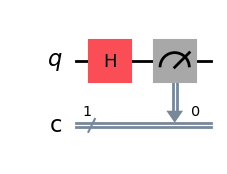

In [3]:
circuit1 = qiskit.QuantumCircuit(1, 1)
circuit1.h(0)
circuit1.measure(0, 0)
circuit1.draw(output="mpl", fold=-1)

## Single Circuit Compilation

We will now compile the above circuit onto Sqale's native gateset and visualize the differences by drawing the compiled circuit

In [4]:
compiler_output = provider.cq_compile(circuit1)

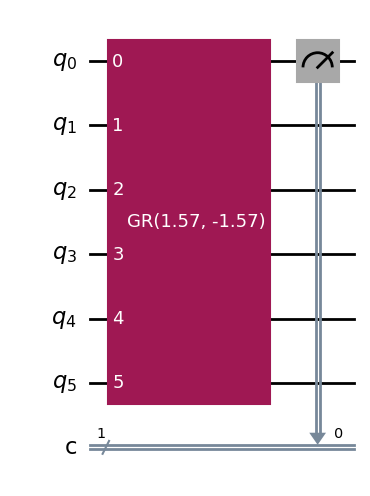

In [5]:
compiler_output.circuit.draw("mpl")

If you would like to compile (or submit) on a different number of qubits, this can be done via the ```grid_shape``` option. This simply sets the shape of the rectangular qubit grid. However, specifying a grid that is incompatible with Sqale's current capabilities will result in an error when submitting.

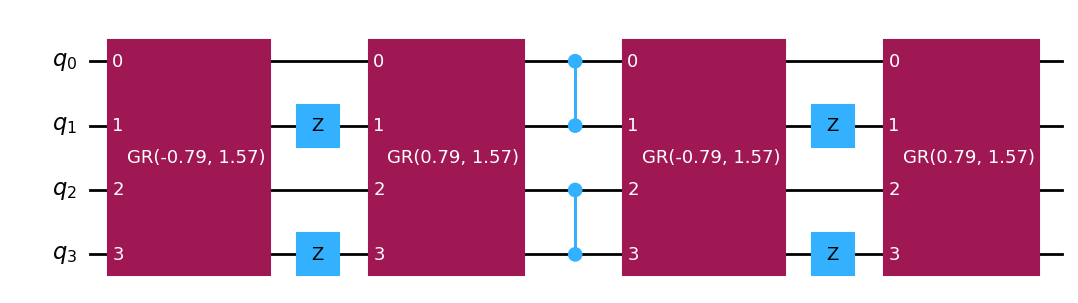

In [6]:
example_circuit = qiskit.QuantumCircuit(4, 1)
example_circuit.cx(0, 1)
example_circuit.cx(2, 3)
new_compiler_output = provider.cq_compile(example_circuit, grid_shape=(2, 2))
new_compiler_output.circuit.draw(output="mpl", fold=-1)

## Multiple circuit compilation

If you would like to compile a batch of circuits in one-go, `qiskit-superstaq` accepts a list of circuits as well. To illustrate this, let us first create a different example two-qubit circuit, and compile both circuits we have created so far at the same time. 

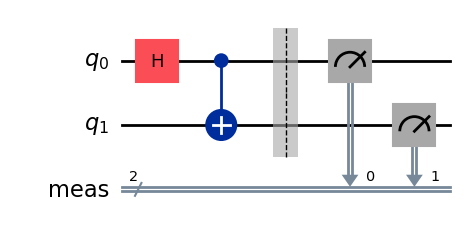

In [7]:
circuit2 = qiskit.QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.measure_all()
circuit2.draw(output="mpl", fold=-1)

In [8]:
compiler_output = provider.cq_compile([circuit1, circuit2])

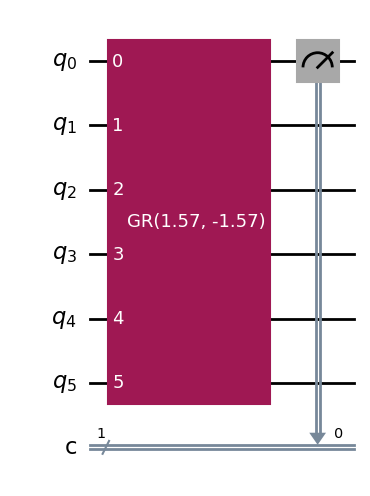

In [9]:
compiler_output.circuits[0].draw("mpl")

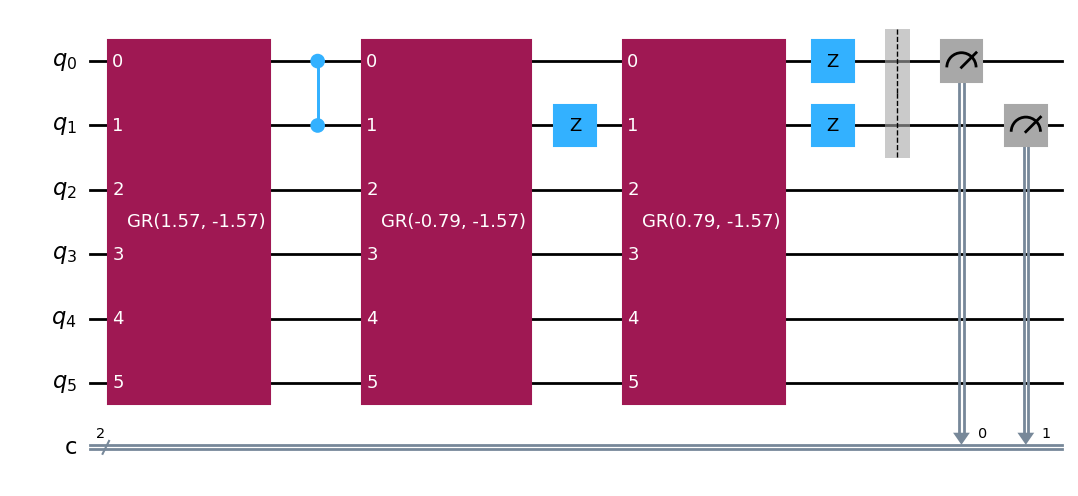

In [10]:
compiler_output.circuits[1].draw("mpl")

## Circuit Submission

All the functionalities we have seen so far can be applied to submit single- or multi-circuit jobs. For example, the code below will submit both the circuits from earlier to the noiseless Sqale simulator. If you would like to run on the Sqale QPU, change the ```target``` argument in ```get_backend()``` from ```cq_sqale_simulator``` to ```cq_sqale_qpu```. It is recommended to first submit to the simulator for testing to ensure your code runs before submitting to the Sqale QPU. 

In [11]:
backend = provider.get_backend(target="cq_sqale_simulator")
job = backend.run([circuit1, circuit2], shots=100)

job_result1 = job.result(index=0)
job_result2 = job.result(index=1)

print(f"Counts from qiskit-superstaq submission for 1st circuit: {job_result1.get_counts()}")
print(f"Counts from qiskit-superstaq submission for 2nd circuit: {job_result2.get_counts()}")

Counts from qiskit-superstaq submission for 1st circuit: {'0': 52, '1': 48}
Counts from qiskit-superstaq submission for 2nd circuit: {'11': 52, '00': 48}


If you would like to submit circuits to a noisy simulator, to see the effects of noise on your simulated measurements without submitting to an actual device, you can additionally pass the argument ```method=noise-sim``` in ```run()```. Here's an example code snippet for a single-circuit simulation:

In [12]:
backend = provider.get_backend("cq_sqale_simulator")
job = backend.run(circuit2, shots=100, method="noise-sim")

print(f"Counts from noisy qiskit-superstaq submission: {job.result().get_counts()}")

Counts from noisy qiskit-superstaq submission: {'00': 38, '11': 56, '01': 4, '10': 2}
